## Elevation Profile Plot from a GPS Track

In [4]:
import pandas as pd
import geopandas as gpd
import os

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [5]:
data_pkg_path = 'data'
gpx_path = os.path.join(data_pkg_path, 'gps', 'sample_gps_track.gpx')

# GPX files contain many layers. Read the 'track_points' layer
gdf = gpd.read_file(gpx_path, layer='track_points')
gdf = gdf[['track_fid','ele', 'time', 'speed', 'geometry']]
gdf

,track_fid,ele,time,speed,geometry
0,0,916.334,2020-02-22T05:18:17+00:00,7.28,POINT (77.58614 12.91214)
1,0,917.815,2020-02-22T05:18:19+00:00,6.12,POINT (77.58627 12.91213)
2,0,919.915,2020-02-22T05:18:21+00:00,6.00,POINT (77.58637 12.91212)
3,0,918.828,2020-02-22T05:18:23+00:00,9.41,POINT (77.58651 12.91210)
4,0,919.799,2020-02-22T05:18:27+00:00,2.98,POINT (77.58663 12.91208)
...,...,...,...,...,...
194,0,897.430,2020-02-22T05:26:52+00:00,9.01,POINT (77.60109 12.90462)
195,0,895.481,2020-02-22T05:26:54+00:00,7.88,POINT (77.60123 12.90462)
196,0,894.034,2020-02-22T05:26:56+00:00,5.53,POINT (77.60135 12.90462)
197,0,894.315,2020-02-22T05:26:58+00:00,5.02,POINT (77.60145 12.90460)


Let's use the timestamp contained in the 'time' column as the index. This will allow us to filter and plot the time-series data easily. We must first convert the time column to datetime type with an appropriate timezone.

In [6]:
gdf['time'] = pd.to_datetime(gdf['time'])
gdf = gdf.set_index('time')
gdf.index = gdf.index.tz_convert('Asia/Kolkata')
gdf

,track_fid,ele,speed,geometry
time,,,,
2020-02-22 10:48:17+05:30,0,916.334,7.28,POINT (77.58614 12.91214)
2020-02-22 10:48:19+05:30,0,917.815,6.12,POINT (77.58627 12.91213)
2020-02-22 10:48:21+05:30,0,919.915,6.00,POINT (77.58637 12.91212)
2020-02-22 10:48:23+05:30,0,918.828,9.41,POINT (77.58651 12.91210)
2020-02-22 10:48:27+05:30,0,919.799,2.98,POINT (77.58663 12.91208)
...,...,...,...,...
2020-02-22 10:56:52+05:30,0,897.430,9.01,POINT (77.60109 12.90462)
2020-02-22 10:56:54+05:30,0,895.481,7.88,POINT (77.60123 12.90462)
2020-02-22 10:56:56+05:30,0,894.034,5.53,POINT (77.60135 12.90462)


Using time as index allows us to filter the data as follows

In [7]:
gdf_subset = gdf['2020-02-22T10:48:00':'2020-02-22T10:49:00']
gdf_subset

,track_fid,ele,speed,geometry
time,,,,
2020-02-22 10:48:17+05:30,0,916.334,7.28,POINT (77.58614 12.91214)
2020-02-22 10:48:19+05:30,0,917.815,6.12,POINT (77.58627 12.91213)
2020-02-22 10:48:21+05:30,0,919.915,6.00,POINT (77.58637 12.91212)
2020-02-22 10:48:23+05:30,0,918.828,9.41,POINT (77.58651 12.91210)
2020-02-22 10:48:27+05:30,0,919.799,2.98,POINT (77.58663 12.91208)
2020-02-22 10:48:34+05:30,0,922.455,0.69,POINT (77.58672 12.91209)
2020-02-22 10:48:39+05:30,0,924.852,2.20,POINT (77.58682 12.91206)
2020-02-22 10:48:43+05:30,0,921.261,4.51,POINT (77.58693 12.91204)
2020-02-22 10:48:45+05:30,0,921.716,5.79,POINT (77.58705 12.91202)


We can now plot the elevation against the timestamp using Matplotlib. Since we have a large number of timestamps, we can use `set_major_locator()` to define what labels will be present on the axis.

Since our timestamps are timezone aware, we can also plot a timezone name (i.e. IST) along with the label.

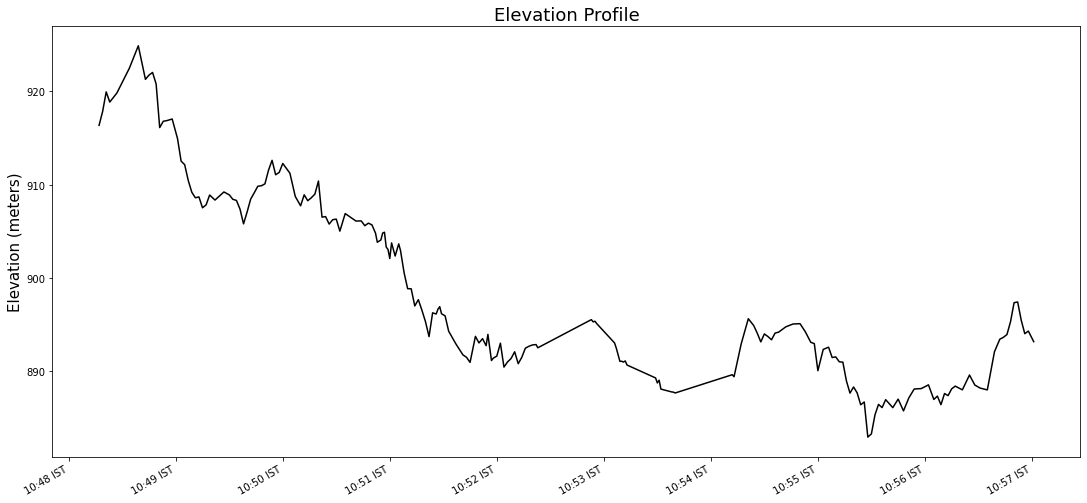

In [9]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)
gdf['ele'].plot(kind='line', ax=ax, color='black')
plt.tight_layout()
plt.title('Elevation Profile', fontsize = 18)
plt.ylabel('Elevation (meters)', size = 15)
plt.xlabel(None)
# Show a ticket every 5 minute
xlocator = mdates.MinuteLocator(interval=1)

xformat = mdates.DateFormatter('%H:%M %Z', tz=gdf.index.tz)  # adds some extra formatting, but not required

ax.xaxis.set_major_locator(xlocator)
ax.xaxis.set_major_formatter(xformat)

plt.show()